In [1]:
import anndata as ad
import scanpy as sc
import scvelo as scv

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
adata = ad.read_h5ad("3_cluster.h5ad")
adata

AnnData object with n_obs × n_vars = 3119 × 5000
    obs: 'sample', 'sample_type', 'barcode', 'well_position', 'well_row', 'well_column', 'cell_type', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rRNA', 'log1p_total_counts_rRNA', 'pct_counts_rRNA', 'total_counts_lncRNA', 'log1p_total_counts_lncRNA', 'pct_counts_lncRNA', 'n_genes', 'doublet_score', 'predicted_doublet', 'sample_group', 'facs_day', '_scvi_batch', '_scvi_labels', 'leiden', 'putative_2CLC'
    var: 'gene_ids', 'feature_types', 'gene_symbol', 'gene_versions', 'gene_type', 'mt', 'rRNA', 'lncRNA', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'hig

In [5]:
embedding = "scvi"
representation = "umap_scvi"
clusters = "leiden"

# Pseudotime

In [6]:
sc.pp.neighbors(adata, use_rep=f'X_{embedding}')
sc.tl.diffmap(adata)

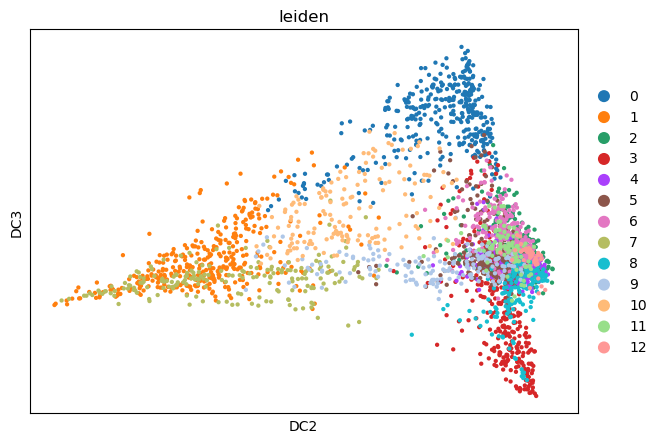

In [7]:
# Setting root cell as described above
root_ixs = adata.obsm["X_diffmap"][:, 3].argmin()
sc.pl.scatter(
    adata,
    basis="diffmap",
    color=[clusters],
    components=[2, 3]
)

adata.uns["iroot"] = root_ixs

In [8]:
sc.tl.dpt(adata)

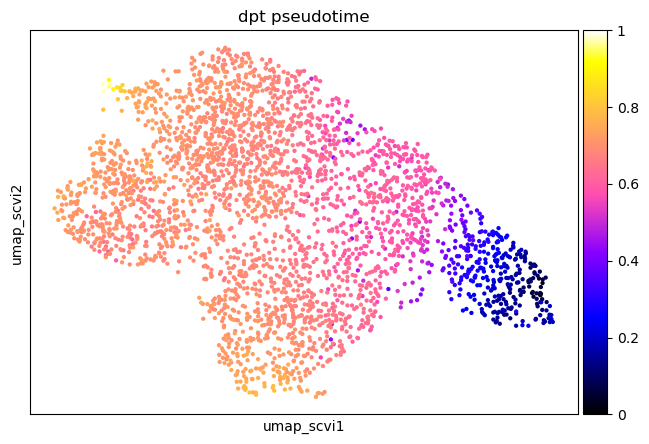

In [9]:
sc.pl.scatter(
    adata,
    basis=representation,
    color=["dpt_pseudotime"],
    color_map="gnuplot2",
)

# RNA velocity with scVelo

In [10]:
adata.X = adata.layers["count"]
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)

Filtered out 4775 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.


/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


In [11]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/nfs

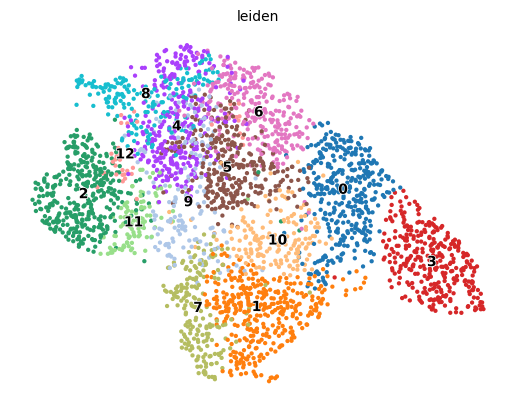

In [12]:
scv.pl.scatter(adata, basis=representation, color=clusters)

## Steady-state model

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 8/64 cores)
or disable the progress bar using `show_progress_bar=False`.


/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=585584) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=585584) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()


    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap_scvi', embedded velocity vectors (adata.obsm)


/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/nfs

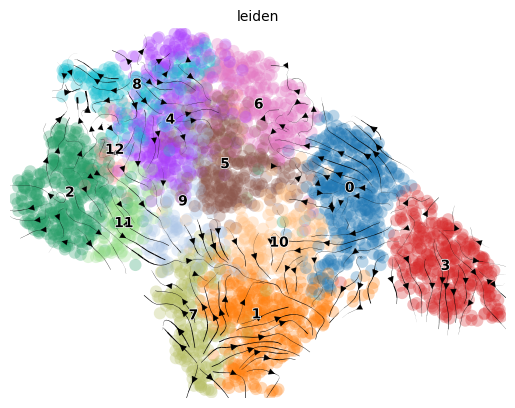

In [13]:
scv.tl.velocity(adata, mode="deterministic")
scv.tl.velocity_graph(adata, n_jobs=8)
scv.pl.velocity_embedding_stream(adata, basis=representation, color=clusters)

## EM model

In [14]:
scv.tl.recover_dynamics(adata, n_jobs=8)

recovering dynamics (using 8/64 cores)


/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=585584) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()


    finished (0:00:03) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/nfs

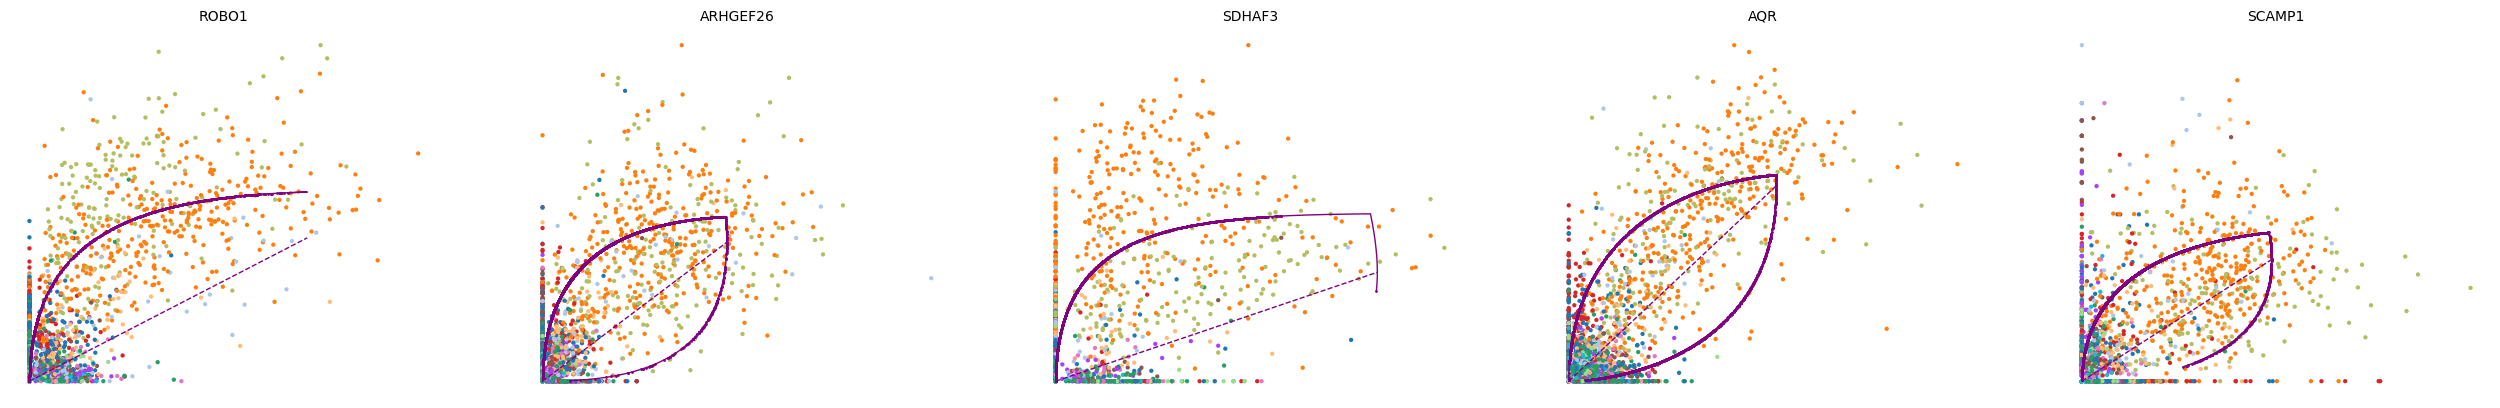

In [15]:
top_genes = adata.var["fit_likelihood"].sort_values(ascending=False).index
scv.pl.scatter(adata, basis=top_genes[:5], color=clusters, frameon=False)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 8/64 cores)


/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=585584) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()


    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap_scvi', embedded velocity vectors (adata.obsm)


/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/nfs/home/students/n.trummer/.conda/envs/single-cell/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/nfs

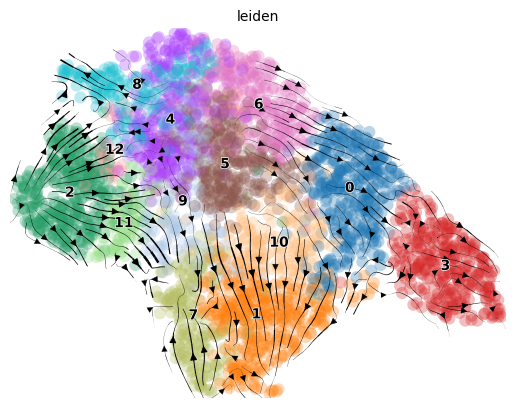

In [16]:
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata, n_jobs=8)
scv.pl.velocity_embedding_stream(adata, basis=representation, color=clusters)